# Project: Wrangling and Analyze Data

In [1]:
# Import packages for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json
import timeit
import functools as ft

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Programmatically download URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
respond = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(respond.content)

In [4]:
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# View head
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Open provided JSON file and append selected columns to dataframe

df = []

with open('tweet_json.txt', 'r') as file:
    for line in file.readlines():
        tweet_line = json.loads(line)
        
        timestamp = tweet_line['created_at']
        tweet_id = tweet_line['id']
        retweet_ct = tweet_line['retweet_count']
        fav_ct = tweet_line['favorite_count']
        
        df.append({'timestamp' : timestamp, 'tweet_id' : tweet_id, 'retweet_count' : retweet_ct, 'favorite_count' : fav_ct})
        
tweet_json = pd.DataFrame(df, columns=['timestamp', 'tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()

,timestamp,tweet_id,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,8853,39467
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,6514,33819
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,4328,25461
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,8964,42908
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,9774,41048


## Assessing Data


### Twitter Archive Dataframe Assessment

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive.describe

<bound method NDFrame.describe of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689      

In [9]:
# Check for duplicate tweet ids

twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
# Get an idea of the names in the data as-is

twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
an             7
Daisy          7
Buddy          7
Toby           7
Milo           6
Stanley        6
Scout          6
Bella          6
Jack           6
Dave           6
Leo            6
Jax            6
Rusty          6
Koda           6
Oscar          6
George         5
            ... 
Cheesy         1
Champ          1
Clarq          1
Gerbald        1
Tove           1
Noosh          1
Tonks          1
Hubertson      1
Fynn           1
Kanu           1
Kirk           1
Gustaf         1
DayZ           1
Harrison       1
Theo           1
Mingus         1
Filup          1
Sparky         1
Boots          1
Willie         1
Kloey          1
Keet           1
Kulet          1
Gòrdón         1
Julius         1
Danny          1
Flash          1
Bertson       

In [11]:
# Determine numerator values in data

twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
# Determine denomintor values in data

twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Image Prediction Dataframe Assessment

In [13]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_prediction.describe

<bound method NDFrame.describe of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221

In [15]:
# View image from first image in image_prediction df

from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg')

In [16]:
# Check for duplicate tweet ids

image_prediction[image_prediction.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [17]:
# Check p1 breed predictions

image_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
teddy                         18
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [18]:
# Check p2 breed predictions

image_prediction['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
toy_terrier                        20
chow                               20
miniature_pinscher                 20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [19]:
# Check p3 breed predictions

image_prediction['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

### Tweet JSON Dataframe Assessment

In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
timestamp         2354 non-null object
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [21]:
tweet_json.describe

<bound method NDFrame.describe of                            timestamp            tweet_id  retweet_count  \
0     Tue Aug 01 16:23:56 +0000 2017  892420643555336193           8853   
1     Tue Aug 01 00:17:27 +0000 2017  892177421306343426           6514   
2     Mon Jul 31 00:18:03 +0000 2017  891815181378084864           4328   
3     Sun Jul 30 15:58:51 +0000 2017  891689557279858688           8964   
4     Sat Jul 29 16:00:24 +0000 2017  891327558926688256           9774   
5     Sat Jul 29 00:08:17 +0000 2017  891087950875897856           3261   
6     Fri Jul 28 16:27:12 +0000 2017  890971913173991426           2158   
7     Fri Jul 28 00:22:40 +0000 2017  890729181411237888          16716   
8     Thu Jul 27 16:25:51 +0000 2017  890609185150312448           4429   
9     Wed Jul 26 15:59:51 +0000 2017  890240255349198849           7711   
10    Wed Jul 26 00:31:25 +0000 2017  890006608113172480           7624   
11    Tue Jul 25 16:11:53 +0000 2017  889880896479866881          

In [22]:
# Check for duplicate tweet ids

tweet_json[tweet_json.tweet_id.duplicated()]

,timestamp,tweet_id,retweet_count,favorite_count


In [23]:
# For potential further analysis - find mean of retweet counts

tweet_json.retweet_count.mean()

3164.7973661852166

In [24]:
# For potential further analysis - find mean of favorite counts

tweet_json.favorite_count.mean()

8080.9685641461347

### Quality issues

1. 'tweet_id' and 'timestamp' will be a duplicated columns and should have different data types

2. Retweets need to be removed

3. Unnecessary columns need to be removed

4. Rename remaining columns with more descriptive names

5. Remove HTML tags

6. Some names are missing ('None') or invalid ('a', 'an', or 'the', etc)

7. Select only records where p1_dog, p2_dog, or p3_dog is True

8. Capitalization and punctuation in breed names is inconsistent

### Tidiness issues

1. Last 4 columns in twitter_archive should be combined, as they refer to the same attribute

2. The dataset in each table is referring to the same thing and should be combined into a single dataframe

## Cleaning Data

In [25]:
# Make copies of original pieces of data

archive_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
tweet_clean = tweet_json.copy()

### Issue 1

#### Define:

This code addresses the following issues:

Quality
* tweet_id and timestamp columns need different data types

Tidiness
* the dataframes need to be merged

#### Code

In [26]:
# Merge twitter archive and image prediction dataframes

merge_one = pd.merge(archive_clean, image_clean, on='tweet_id', how='outer')

# Merge merge_one dataframe with the tweet JSON dataframe

merged_clean = pd.merge(merge_one, tweet_clean, on=['tweet_id','timestamp'], how='outer')

In [27]:
# Change tweet_id data type to a string

merged_clean[['tweet_id']] = merged_clean[['tweet_id']].astype(str)

In [28]:
# Change timestamp to datetime data type and strip year, month, day, and time for analysis or visualization

merged_clean['year'] = pd.to_datetime(merged_clean['timestamp']).dt.year
merged_clean['month'] = pd.to_datetime(merged_clean['timestamp']).dt.month
merged_clean['day'] = pd.to_datetime(merged_clean['timestamp']).dt.day
merged_clean['time'] = pd.to_datetime(merged_clean['timestamp']).dt.time

#### Test

In [29]:
# Check that changes are made

merged_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,year,month,day,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,banana,0.076110,False,NaN,NaN,2017,8,1,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,papillon,0.068957,True,NaN,NaN,2017,8,1,00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,kelpie,0.031379,True,NaN,NaN,2017,7,31,00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,spatula,0.040836,False,NaN,NaN,2017,7,30,15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,German_short-haired_pointer,0.175219,True,NaN,NaN,2017,7,29,16:00:24


In [30]:
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4710 entries, 0 to 4709
Data columns (total 34 columns):
tweet_id                      4710 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     4710 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                    

### Issue 2

#### Define:

This code addresses the following issues:

Quality
* remove retweets

#### Code

In [31]:
# Keeps only rows where retweet_status_id is null

merged_clean = merged_clean[np.isnan(merged_clean.retweeted_status_id)]

#### Test

In [32]:

merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4709
Data columns (total 34 columns):
tweet_id                      4529 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     4529 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       199

### Issue 3

#### Define:

This code addresses the following issues:

Quality
* remove unnecessary columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, img_num

#### Code

In [33]:
# Drop retweet related and other unnecessary columns

merged_clean = merged_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
                                  'in_reply_to_status_id', 'in_reply_to_user_id', 'img_num'], axis=1)

#### Test

In [34]:
# Check changes

merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4709
Data columns (total 28 columns):
tweet_id              4529 non-null object
timestamp             4529 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 no

### Issue 4

#### Define:

This code addresses the following issues:

Quality
* some names are missing ('None') or invalid ('a', 'an', or 'the', etc)

#### Code

In [35]:
# Replace invalid names with 'None'
merged_clean.name = merged_clean.name.str.replace('^[a-z]+', 'None')

# Delete names set to 'None'
merged_clean = merged_clean[merged_clean.name != 'None']

#### Test

In [36]:
# View name value counts

merged_clean['name'].value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Winston       8
Lola          8
Sadie         8
Toby          7
Daisy         7
Bo            6
Bella         6
Koda          6
Jax           6
Oscar         6
Bailey        6
Stanley       6
Scout         5
Rusty         5
Chester       5
Leo           5
Louis         5
Dave          5
Milo          5
Buddy         5
Bentley       5
Bear          4
Winnie        4
Jerry         4
             ..
Clarq         1
Gerbald       1
Nollie        1
Tove          1
Kenzie        1
Dawn          1
Shadoe        1
Loomis        1
Keet          1
Harrison      1
Theo          1
Mingus        1
Filup         1
Fynn          1
Boots         1
Astrid        1
Kloey         1
Canela        1
Kulet         1
Noosh         1
Harper        1
Julius        1
Danny         1
Flash         1
Bertson       1
Mollie        1
Willie        1
Hubertson     1
Tonks         1
Ralphy        1
Name: name, Length: 930,

### Issue 5

#### Define:

This code addresses the following issues:

Quality
* select only images where column p1_dog, p2_dog, or p3_dog are True

I'm also assigning the result with the highest image prediction to a new column named dog_breed for potential future analysis or visualization.

#### Code

In [37]:
# Remove any image predictions that aren't dogs

merged_clean = merged_clean[merged_clean.p1_dog != False]
merged_clean = merged_clean[merged_clean.p2_dog != False]
merged_clean = merged_clean[merged_clean.p3_dog != False]

# Assign dog_breed with the results of the highest image prediction confidence

merged_clean['dog_breed'] = 'None'

for i, row in merged_clean.iterrows():

    if row.p1_dog:
        merged_clean.at[i, 'dog_breed']=row.p1
        
    elif row.p2_dog and row.rating_numerator >= 10:
        merged_clean.at[i, 'dog_breed']=row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        merged_clean.at[i, 'dog_breed']=row.p3
    else:
        merged_clean.at[i, 'dog_breed']='None'

#### Test

In [38]:
merged_clean.dog_breed.value_counts()

golden_retriever                  77
Pembroke                          56
Labrador_retriever                50
Chihuahua                         38
pug                               26
toy_poodle                        20
Pomeranian                        20
malamute                          19
chow                              18
French_bulldog                    17
Samoyed                           16
cocker_spaniel                    16
Siberian_husky                    16
miniature_pinscher                16
Shih-Tzu                          13
beagle                            13
Staffordshire_bullterrier         13
German_shepherd                   12
Shetland_sheepdog                 12
Chesapeake_Bay_retriever          12
Cardigan                          11
Border_collie                     10
collie                            10
American_Staffordshire_terrier    10
Rottweiler                         9
Italian_greyhound                  9
Bernese_mountain_dog               9
E

### Issue 6

#### Define:

This code addresses the following issues:

Quality
* capitalization and punctuation in breed names is inconsistent

#### Code

In [39]:
# Replace underscores with spaces

merged_clean.dog_breed = merged_clean.dog_breed.str.replace('_', ' ')

# Capitalize the first letter of the breed name

merged_clean.dog_breed = merged_clean.dog_breed.str.capitalize()

#### Test

In [40]:
merged_clean.dog_breed.value_counts()

Golden retriever                  77
Pembroke                          56
Labrador retriever                50
Chihuahua                         38
Pug                               26
Pomeranian                        20
Toy poodle                        20
Malamute                          19
Chow                              18
French bulldog                    17
Cocker spaniel                    16
Samoyed                           16
Miniature pinscher                16
Siberian husky                    16
Shih-tzu                          13
Beagle                            13
Staffordshire bullterrier         13
German shepherd                   12
Shetland sheepdog                 12
Chesapeake bay retriever          12
Cardigan                          11
Collie                            10
American staffordshire terrier    10
Border collie                     10
Airedale                           9
Italian greyhound                  9
Basset                             9
R

### Issue 7

#### Define:

This code addresses the following issues:

Tidiness
* 'None' in last 4 columns (doggo|floofer|pupper|puppo) not handled as a null value

#### Code

In [41]:
# Replace 'None' with empty strings

merged_clean.doggo.replace('None', '', inplace=True)
merged_clean.floofer.replace('None', '', inplace=True)
merged_clean.pupper.replace('None', '', inplace=True)
merged_clean.puppo.replace('None', '', inplace=True)

# Combine into a new stage column

merged_clean['stage'] = merged_clean.doggo + merged_clean.floofer + merged_clean.pupper + merged_clean.puppo

In [42]:
# Format to separate entries with multiple stages
# doggo
merged_clean.loc[merged_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
merged_clean.loc[merged_clean.stage == 'doggoflooferpupper', 'stage'] = 'doggo,floofer,pupper'
merged_clean.loc[merged_clean.stage == 'doggoflooferpupperpuppo', 'stage'] = 'doggo,floofer,pupper,puppo'

merged_clean.loc[merged_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
merged_clean.loc[merged_clean.stage == 'doggopupperpuppo', 'stage'] = 'doggo,pupper,puppo'

merged_clean.loc[merged_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 

# floofer
merged_clean.loc[merged_clean.stage == 'flooferpupper', 'stage'] = 'floofer,pupper'
merged_clean.loc[merged_clean.stage == 'flooferpupperpuppo', 'stage'] = 'floofer,pupper,puppo'

merged_clean.loc[merged_clean.stage == 'flooferpuppo', 'stage'] = 'floofer,puppo'

# pupper
merged_clean.loc[merged_clean.stage == 'pupperpuppo', 'stage'] = 'pupper,puppo'

In [43]:
# Replace empty string with NaN

merged_clean.stage.replace({'': np.nan}, inplace=True)

#### Test

In [44]:
merged_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p3_conf,p3_dog,retweet_count,favorite_count,year,month,day,time,dog_breed,stage
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,,...,0.068957,True,NaN,NaN,2017,8,1,00:17:27,Chihuahua,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,,...,0.031379,True,NaN,NaN,2017,7,31,00:18:03,Chihuahua,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,,...,0.175219,True,NaN,NaN,2017,7,29,16:00:24,Basset,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,,,...,0.118184,True,NaN,NaN,2017,7,27,16:25:51,Irish terrier,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,,...,0.029248,True,NaN,NaN,2017,7,26,15:59:51,Pembroke,doggo


### Issue 8

#### Define:

This code addresses the following issues:

Quality
* remove HTML tags

#### Code

In [45]:
# Replace HTML tags with blank strings

merged_clean['source'] = merged_clean['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [46]:
# Check that values in source column don't include HTML tags

merged_clean['source'].value_counts()

Twitter for iPhone     838
Vine - Make a Scene     41
Twitter Web Client      10
TweetDeck                4
Name: source, dtype: int64

### Issue 9

#### Define:

This code addresses the following issues:

Quality
* rename columns with more descriptive names where appropriate

#### Code

In [47]:
# Evaluate current column names to see which will change

merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3247 entries, 1 to 4709
Data columns (total 30 columns):
tweet_id              3247 non-null object
timestamp             3247 non-null object
source                893 non-null object
text                  893 non-null object
expanded_urls         893 non-null object
rating_numerator      893 non-null float64
rating_denominator    893 non-null float64
name                  893 non-null object
doggo                 893 non-null object
floofer               893 non-null object
pupper                893 non-null object
puppo                 893 non-null object
jpg_url               852 non-null object
p1                    852 non-null object
p1_conf               852 non-null float64
p1_dog                852 non-null object
p2                    852 non-null object
p2_conf               852 non-null float64
p2_dog                852 non-null object
p3                    852 non-null object
p3_conf               852 non-null float64
p3_d

In [48]:
# Change source, text, name, p1, p2, and p3 column names

merged_clean.rename(columns={'source': 'tweet_source', 'text': 'tweet_content', 'name': 'dog_name', 'p1': 'breed_predict_1', 'p2': 'breed_predict_2', 'p3': 'breed_predict_3'}, inplace=True)

In [49]:
# Check changes

merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3247 entries, 1 to 4709
Data columns (total 30 columns):
tweet_id              3247 non-null object
timestamp             3247 non-null object
tweet_source          893 non-null object
tweet_content         893 non-null object
expanded_urls         893 non-null object
rating_numerator      893 non-null float64
rating_denominator    893 non-null float64
dog_name              893 non-null object
doggo                 893 non-null object
floofer               893 non-null object
pupper                893 non-null object
puppo                 893 non-null object
jpg_url               852 non-null object
breed_predict_1       852 non-null object
p1_conf               852 non-null float64
p1_dog                852 non-null object
breed_predict_2       852 non-null object
p2_conf               852 non-null float64
p2_dog                852 non-null object
breed_predict_3       852 non-null object
p3_conf               852 non-null float64
p3_d

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
merged_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

After a few rough drafts of how best to approach this section of my project, I settled on a question-and-answer format, saving the 3 best insights I gained. I thought about as many questions as I could think to answer, then picked the 3 I wanted to answer the most.

### Questions:
1. What are the 5 most popular breeds?

2. What are the 3 most popular names (that are not "None")? What is the least popular name of all?

3. What is the most popular rating numerator, and how does that compare to the average rating numerator across this dataset?

#### Analysis

I was able to use previously completed work to answer my first and second questions. However, for my third question, additional analysis is required.

In [51]:
# Most popular rating numerator

merged_clean.rating_numerator.mode()

0    12.0
dtype: float64

In [52]:
# Average rating numerator

merged_clean.rating_numerator.mean()

11.087346024636059

### Insights:
1. The 5 most popular breeds are (by its number of appearances in the data):
    Golden retriever - 156
    Labrador retriever - 107
    Pembroke - 94
    Chihuahua - 85
    Pug - 60
    
    This is similar to the results of the American Kennel Clubs's most popular dog breeds, which interested me, since I didn't expect the breed trends for WeRateDogs to so closely match the results of such a large, official organization like the AKC.
  
  
2. The most popular names are a succession of ties for the top 3. Lucy and Charlie both had 11 appearances, Cooper and Oliver had 10, and Penny and Tucker both had 9. The least popular name isn't so much *the* least popular, but a fairly long list of names that enjoy only a single appearance in the data.
  
  
3. The most popular rating numerator, meaning the one most often assigned in Tweets, is 12. This is similar to the average of all the rating numerators assigned, which comes in at 13.22.

### Visualization

In [53]:
# Create viz-specific df

Jan = sum(merged_clean['month'] == 1)
Feb = sum(merged_clean['month'] == 2)
Mar = sum(merged_clean['month'] == 3)
Apr = sum(merged_clean['month'] == 4)
May = sum(merged_clean['month'] == 5)
Jun = sum(merged_clean['month'] == 6)
Jul = sum(merged_clean['month'] == 7)
Aug = sum(merged_clean['month'] == 8)
Sep = sum(merged_clean['month'] == 9)
Oct = sum(merged_clean['month'] == 10)
Nov = sum(merged_clean['month'] == 11)
Dec = sum(merged_clean['month'] == 12)

d = {'Month' : ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Count' : [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, 
               Sep, Oct, Nov, Dec]}

viz_df = pd.DataFrame(data=d)

([<matplotlib.axis.XTick at 0x7fb33fadac50>,
 <a list of 12 Text xticklabel objects>)

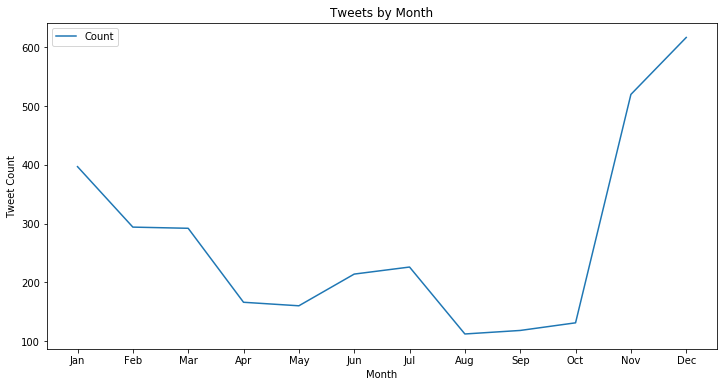

In [54]:
# number of tweets by month

viz_df.plot.line(x='Month', figsize =(12,6))
plt.title('Tweets by Month')
plt.ylabel('Tweet Count')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

This line plot shows us that there is a significant increase in We Rate Dogs tweets during fall and winter months.